# Fast search with FAISS
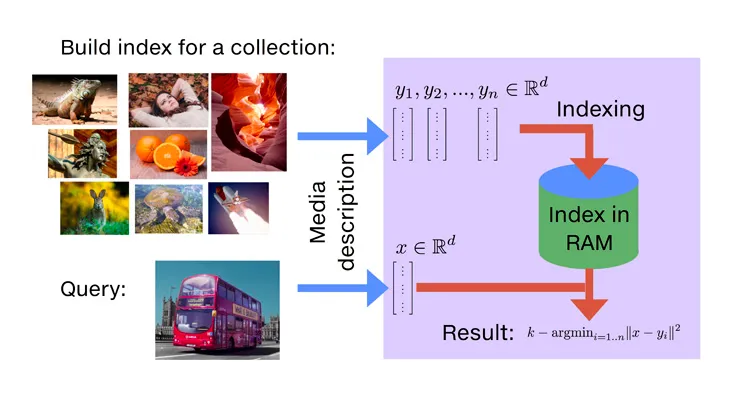

In [ ]:
!pip install faiss-cpu
# faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 43.1 MB/s eta 0:00:00


In [ ]:
import faiss

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()
print("Image Data Shape" , digits.data.shape)

Image Data Shape (1797, 64)


In [ ]:
def draw_mnist(arr):
    plt.figure(figsize=(len(arr)*4,4))
    for index, (image) in enumerate(zip(arr)):
        plt.subplot(1, len(arr), index + 1)
        plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)

In [ ]:
# mnist indexing
d = 64                      # dimension
nb = 100                    # database size
nq = 10                     # nb of queries

xb = digits.data.astype('float32')
xq = digits.data[0:1].astype('float32') # Use the first image as the query vector

print('xb.shape : ', xb.shape, '\nxq.shape : ', xq.shape)

xb.shape :  (1797, 64) 
xq.shape :  (1, 64)


In [ ]:
index = faiss.IndexFlatL2(d)   # build the index
print('index.is_trained : ', index.is_trained)

index.add(xb)                  # add vectors to the index
print('index.ntotal : ', index.ntotal)

index.is_trained :  True
index.ntotal :  1797


In [ ]:
k = 10                          # we want to see top k nearest neighbors (the first result will always be the query vector)
D, I = index.search(xq, k)     # actual search
print('I[:5] : ', I[:k])                   # neighbors of the 5 first queries
print('D[:5] : ', D[:k])                   # distances of the 5 first queries

I[:5] :  [[   0  877 1365 1541 1167 1029  464  957 1697  855]]
D[:5] :  [[  0. 120. 164. 172. 176. 178. 181. 238. 245. 252.]]


In [ ]:
arr = np.empty([0,64])
i = 0
for i in range(k):
    print('index : ', I[0,i], '\ndistance : ', D[0,i], '\narr : ', xb[I[0,i]])
    arr = np.vstack((arr, xb[I[0,i]]))
print('arr.shape : ', arr.shape)

index :  0 
distance :  0.0 
arr :  [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
index :  877 
distance :  120.0 
arr :  [ 0.  0.  7. 13.  8.  4.  0.  0.  0.  1. 15. 11.  9. 15.  2.  0.  0.  4.
 16.  6.  0.  8.  7.  0.  0.  4. 10.  0.  0.  7.  8.  0.  0.  4. 10.  0.
  0.  8.  8.  0.  0.  5. 12.  0.  0. 12.  5.  0.  0.  3. 15.  5.  9. 14.
  2.  0.  0.  0.  8. 14. 12.  3.  0.  0.]
index :  1365 
distance :  164.0 
arr :  [ 0.  0.  5. 13. 11.  1.  0.  0.  0.  3. 16. 11.  8. 12.  0.  0.  0.  5.
 16.  0.  0. 13.  3.  0.  0.  5. 13.  0.  0.  6.  7.  0.  0.  7. 10.  0.
  0.  8.  7.  0.  0.  4. 13.  0.  1. 14.  5.  0.  0.  1. 15.  5. 12. 10.
  0.  0.  0.  0.  7. 16. 10.  1.  0.  0.]
index :  1541 
distance :  172.0 
arr :  [ 0.  0.  5. 12.  9.  1.  0.  0.  0.  0. 14. 14. 13. 13.  0

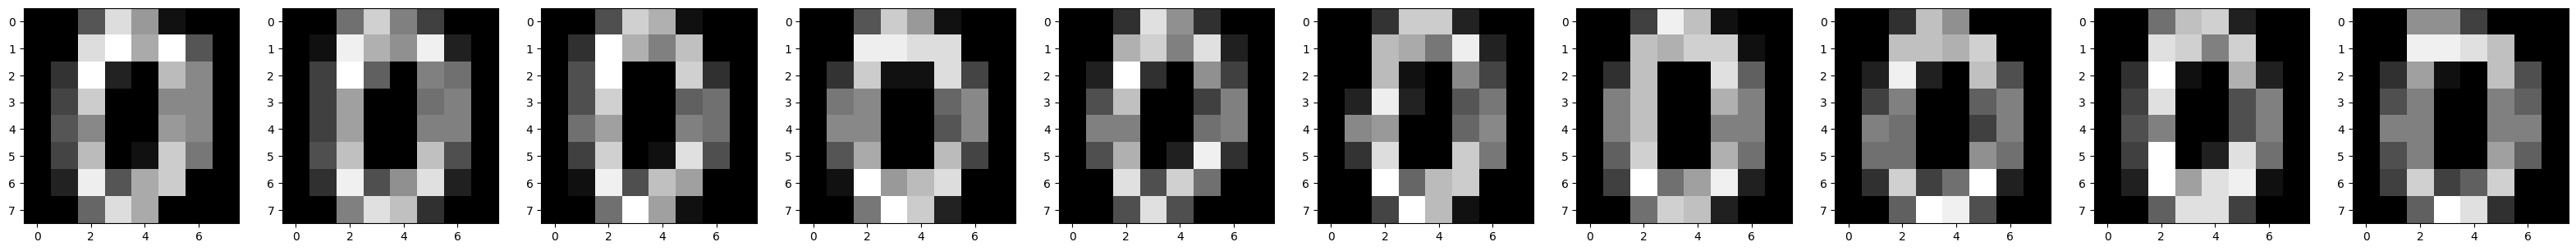

In [ ]:
draw_mnist(arr)

https://github.com/facebookresearch/faiss/wiki/Faiss-indexes

In [ ]:
index = faiss.IndexLSH(d, 512)   # build the index
print('index.is_trained : ', index.is_trained)

index.add(xb)                  # add vectors to the index
print('index.ntotal : ', index.ntotal)

index.is_trained :  True
index.ntotal :  1797


In [ ]:
k = 10                          # we want to see top k nearest neighbors (the first result will always be the query vector)
D, I = index.search(xq, k)     # actual search
print('I[:5] : ', I[:k])                   # neighbors of the 5 first queries
print('D[:5] : ', D[:k])                   # distances of the 5 first queries

I[:5] :  [[   0 1365  877  464  396 1541 1029 1697  957 1167]]
D[:5] :  [[ 0. 31. 32. 37. 38. 38. 39. 42. 43. 43.]]


In [ ]:
arr = np.empty([0,64])
i = 0
for i in range(k):
    print('index : ', I[0,i], '\ndistance : ', D[0,i], '\narr : ', xb[I[0,i]])
    arr = np.vstack((arr, xb[I[0,i]]))
print('arr.shape : ', arr.shape)

index :  0 
distance :  0.0 
arr :  [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
index :  1365 
distance :  31.0 
arr :  [ 0.  0.  5. 13. 11.  1.  0.  0.  0.  3. 16. 11.  8. 12.  0.  0.  0.  5.
 16.  0.  0. 13.  3.  0.  0.  5. 13.  0.  0.  6.  7.  0.  0.  7. 10.  0.
  0.  8.  7.  0.  0.  4. 13.  0.  1. 14.  5.  0.  0.  1. 15.  5. 12. 10.
  0.  0.  0.  0.  7. 16. 10.  1.  0.  0.]
index :  877 
distance :  32.0 
arr :  [ 0.  0.  7. 13.  8.  4.  0.  0.  0.  1. 15. 11.  9. 15.  2.  0.  0.  4.
 16.  6.  0.  8.  7.  0.  0.  4. 10.  0.  0.  7.  8.  0.  0.  4. 10.  0.
  0.  8.  8.  0.  0.  5. 12.  0.  0. 12.  5.  0.  0.  3. 15.  5.  9. 14.
  2.  0.  0.  0.  8. 14. 12.  3.  0.  0.]
index :  464 
distance :  37.0 
arr :  [ 0.  0.  4. 15. 12.  1.  0.  0.  0.  0. 12. 11. 13. 13.  1.  0

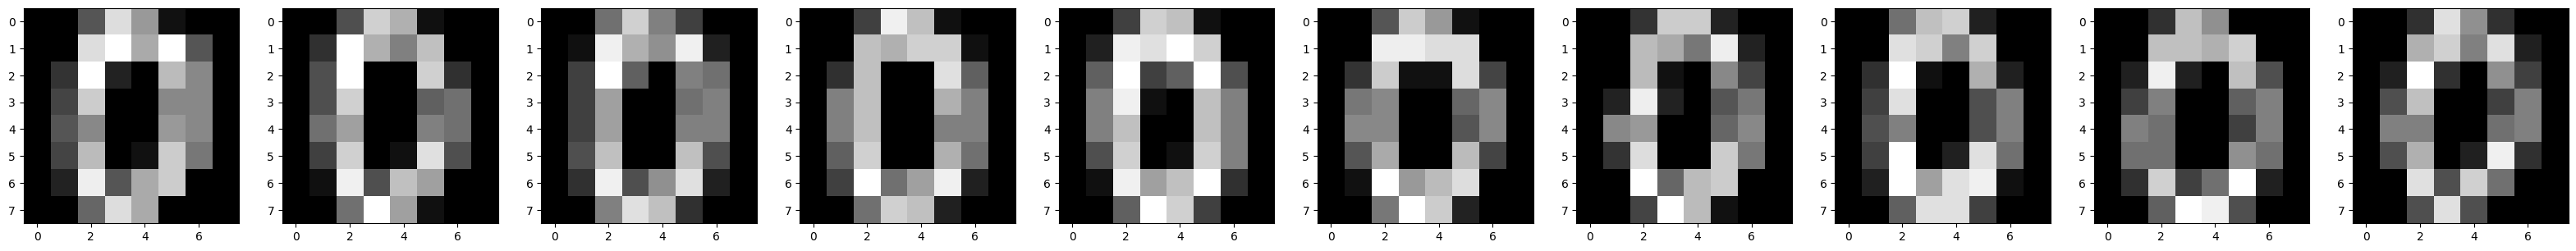

In [ ]:
draw_mnist(arr)

## Play with FAISS
- K-NN
- Change dataset
- Apprximate search VS direct search
- Multiple-step retrieval

## Alternatives to FAISS : Vector Database
- Qdrant
- Chroma (from Langchain)
- Milvus
- HNSWlib (Hierarchical Navigable Small World)
- ScaNN (Scalable Nearest Neighbors)
- Pinecone
- ...

# Sentence Embedding and Text Retrieval

In [ ]:
!pip install faiss-gpu

In [ ]:
!pip install datasets
!pip install langchain
!pip install -U langchain-community
!pip install sentence-transformers
!pip install tiktoken # a fast BPE(Byte-Pair encoding) tokenizer created by OpenAI to count the number of tokens.

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.8/401.8 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/14

In [ ]:
from datasets import load_dataset

data = load_dataset("LLukas22/cqadupstack", trust_remote_code=True)
data

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/2.03k [00:00<?, ?B/s]

train.json:   0%|          | 0.00/383M [00:00<?, ?B/s]

validation.json:   0%|          | 0.00/50.3M [00:00<?, ?B/s]

test.json:   0%|          | 0.00/50.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/201416 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/23399 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/23611 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['question', 'answer', 'title', 'forum_tag'],
        num_rows: 201416
    })
    validation: Dataset({
        features: ['question', 'answer', 'title', 'forum_tag'],
        num_rows: 23399
    })
    test: Dataset({
        features: ['question', 'answer', 'title', 'forum_tag'],
        num_rows: 23611
    })
})

In [ ]:
data["train"][0]

{'question': "I am again and again noticing that a ton of apps ask for ridiculous permissions, and I'm getting frustrated by searching for apps that don't ask me for too much - and frankly, I would download 3 times as much apps if they would ask for reasonable permissions. The one that I personally don't like to share is my <code> phone id </code> and <code> your accounts </code> , but there are various apps asking for permissions they don't need. Some examples: A game that needs to load itself after boot. A game that needs my accounts. A game that needs my phone calls. A browser that needs my phone calls and accounts. Why are these permissions requests there? Are most of them doing some data collecting? Are the developers too lazy to check what permissions they really need?",
 'answer': 'There are a few points to note on this. Not all of them will help you on your issue, but at least explain things or point you to helpful information: some devs explain in their apps\' descriptions wha

In [ ]:
small_data = data["train"].select(range(1_000))

In [ ]:
# Splitting based on the token limit
from langchain.text_splitter import CharacterTextSplitter

text_splitter = CharacterTextSplitter.from_tiktoken_encoder(
    separator = "\n\n",
    chunk_size = 1200,
    chunk_overlap = 100,
    is_separator_regex = False,
    model_name='text-embedding-3-small', #used to calculate tokens
    encoding_name='text-embedding-3-small'
)

## Sentence transformer
https://huggingface.co/sentence-transformers

In [ ]:
from transformers import AutoTokenizer, AutoModel

model_name = "BAAI/bge-base-en-v1.5"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
model

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/777 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
import torch

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
dim = 768

In [ ]:
def get_embedding(model, tokenizer, device, txt):
    encoded_input = tokenizer(
        txt, padding=True, truncation=True, return_tensors="pt"
    ).to(device)
    emb = model(**encoded_input)
    emb = emb.pooler_output[0].cpu().detach()
    return torch.nn.functional.normalize(emb, dim=0) # normalize since we'd like to use cosine sim

In [ ]:
doc_list = []
for i,d in enumerate(small_data):

  for t in text_splitter.create_documents([d["title"]]):
    emb = get_embedding(model, tokenizer, device, t.page_content)
    t.metadata = {"index": i, "emb": emb}
    doc_list.append(t)

  for t in text_splitter.create_documents([d["question"]]):
    emb = get_embedding(model, tokenizer, device, t.page_content)
    t.metadata = {"index": i, "emb": emb}
    doc_list.append(t)
  # break

In [ ]:
import faiss
import numpy as np

# Inner product for cosine similarity
faiss_index = faiss.IndexFlatIP(dim)

# tell faiss that we will add additional ids
faiss_index = faiss.IndexIDMap(faiss_index)

embeddings, idx = [], []
for i in range(len(doc_list)):
  embeddings.append(doc_list[i].metadata["emb"])
  idx.append(doc_list[i].metadata["index"])

embeddings = np.array(embeddings)
idx = np.array(idx)

faiss_index.add_with_ids(embeddings, idx)

In [ ]:
data["test"][2]

{'question': 'I am relatively new to rooting and stuff. I have just rooted my android tablet. It\'s a Chinese tablet, not much about it is available on the internet. Can I install ROM for another device on my tablet? I saw many videos on YouTube showing "How to install any ROM on any Android device". Does \'any\' here mean that I can install, let\'s say, a Nexus ROM on my tablet? Is there some generic ROM which can be installed on all androids? If so, can I install this generic ROM and then upgrade to a ROM of another device? If no, is there a way to do so? (If not, then how do manufacturers put their ROM for the first time?)',
 'answer': "You won't be able to install a ROM from a different device, unless it is ported to your device - there are write-ups on the XDA forums on this. There isn't any generic ROM for all devices. Each device has its own chipset and hardware, that has its own firmware (software) design for it. In order for there to be a generic ROM, it would have to have the

In [ ]:
query_vector = get_embedding(model, tokenizer, device, data["test"][2]["question"])

k = 100  # Number of nearest neighbors to retrieve
distances, indices = faiss_index.search(np.array([query_vector], dtype=np.float32), k)

indices

array([[372, 858, 179, 287, 935, 165, 480, 557, 522,  62,  88,  80, 169,
        815, 154, 274, 168, 851, 456, 491, 947, 962,  36,  19, 380, 204,
         49,  28, 256, 906, 579, 635, 660, 385, 190, 851, 554, 117, 934,
        324, 951, 519, 798, 187, 672, 795, 316, 958, 573, 264, 434, 400,
         71, 546, 254, 323, 623,  70, 392, 421, 762, 850, 547, 535, 599,
        270, 848, 178,  19,  79, 832, 160, 526, 752, 619, 760,  78, 149,
        167, 258, 291, 594, 442, 783, 138, 986, 865,  93, 689, 352, 384,
        898, 310, 278, 605,  52, 243, 371, 503, 978]])

In [ ]:
indices

In [ ]:
for i in indices[0]:
  i = int(i)
  if data["train"][i]["question"].find("ROM")>=0:
    print("*"*20)
    print(data["train"][i]["title"])
    print(data["train"][i]["question"])

********************
Do I need to downgrade my Xperia J to ICS before installing a custom ROM?
I would like to install a Custom ROM in my Xperia J and its named AVD ROM . To install that ROM do I have to install the ICS first or no need? Please help me. thank you.
********************
Transfer files from recovery on a Nexus 10
My Nexus 10 won't boot, so I need to copy a ROM from my computer to the device. Since it won't boot, I need to copy it via recovery. I can flash recoveries as needed and install software on my computer as needed, but I need to get the ROM on there!
********************
OUYA Custom ROM support
OUYA has been one of the largest backed products on Kickstarter . Unfortunately it runs a custom version of Android which does not provide Google Play Store support. At the same time by design it is supposed to hackable so I wanted to explore the available options in terms of custom ROMs. Are the any custom ROMs available (or planned/in development) for OUYA?
***************

## Multiple-step retrieval with FAISS

In [ ]:
k = 50  # Number of nearest neighbors to retrieve
indices = []

question = data["test"][2]["question"] # <========== 1st step using question
for t in text_splitter.create_documents([question]):
  qemb = get_embedding(model, tokenizer, device, t.page_content)

  dist, ind = faiss_index.search(np.array([qemb], dtype=np.float32), k)
  indices += list(ind)

indices = np.array(indices)

In [ ]:
faiss_index_tmp = faiss.IndexFlatIP(dim)
faiss_index_tmp = faiss.IndexIDMap(faiss_index_tmp)

embeddings_tmp = embeddings[indices[0]]
idx_tmp = idx[indices[0]]

faiss_index_tmp.add_with_ids(embeddings_tmp, idx_tmp)

# 2nd step using title
query_vector = get_embedding(model, tokenizer, device, data["test"][2]["title"])

k = 50  # Number of nearest neighbors to retrieve
distances, indices = faiss_index_tmp.search(np.array([query_vector], dtype=np.float32), k)

indices[0]

In [ ]:
data["train"][93]

In [ ]:
data["train"][289]

## Use LLaMA3 to synthesis the answer

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
import torch
import transformers

chat_pipeline = transformers.pipeline(
        "text-generation",
        model="meta-llama/Meta-Llama-3-8B-Instruct",
        model_kwargs={"torch_dtype": torch.bfloat16},
        device="cuda")

config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/73.0 [00:00<?, ?B/s]

In [ ]:
system_prompt = """
Answer the question based on the context below.
Keep the answer short.
Respond "I don't know" if not sure about the answer.
"""
messages = [
    {"role": "system", "content": system_prompt}
]

for i in [372, 858, 179, 287, 935, 165, 480, 557, 522,  62,  88,  80, 169,
        815, 154, 274, 168, 851, 456, 491, 947, 962]:
  messages.append({"role": "user"  , "content": "Question: " + data["train"][i]["question"]})
  messages.append({"role": "system", "content": "Answer: " + data["train"][i]["answer"]})

messages.append({"role": "user"  , "content": "Question: " + data["test"][2]["question"]})

terminators = [
    chat_pipeline.tokenizer.eos_token_id,
    chat_pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
]

outputs = chat_pipeline(
            messages,
            eos_token_id=terminators,
            max_new_tokens=256,
            pad_token_id=chat_pipeline.tokenizer.eos_token_id
        )


In [ ]:
outputs

[{'generated_text': [{'role': 'system',
    'content': '\nAnswer the question based on the context below.\nKeep the answer short.\nRespond "I don\'t know" if not sure about the answer.\n'},
   {'role': 'user',
    'content': "Question: I have seen two methods, which claim that they root an Android device, that I don't know the difference of. Method 1 is as easy as installing the SuperSU from Google Play. Method 2 is going downloading some files, going to recovery mode by pushing some complex buttons simultaneously, and much more difficult stuff. (e.g. here ) What is the difference? Does Rooting in both methods mean the same thing? If yes, why should anyone bother himself trying the second method? Regards"},
   {'role': 'system',
    'content': "Answer: Just installing SuperSU don't give you root - it's only tool for controlling access to root account on rooted device. From app's description: SuperSU requires a rooted device !!!"},
   {'role': 'user',
    'content': 'Question: Is it pos

## Play with LLaMA3

In [ ]:
system_prompt = """

Thailand,[a] officially the Kingdom of Thailand and historically known as Siam (the official name until 1939),[b] is a country in Southeast Asia on the Indochinese Peninsula. With a population of almost 66 million,[8] it spans 513,115 square kilometres (198,115 sq mi).[9] Thailand is bordered to the northwest by Myanmar, to the northeast and east by Laos, to the southeast by Cambodia, to the south by the Gulf of Thailand and Malaysia, and to the southwest by the Andaman Sea; it also shares maritime borders with Vietnam to the southeast and Indonesia and India to the southwest. Bangkok is the state capital and largest city.[10]

Thai peoples migrated from southwestern China to mainland Southeast Asia from the 6th to 11th centuries. Indianised kingdoms such as the Mon, Khmer Empire, and Malay states ruled the region, competing with Thai states such as the Kingdoms of Ngoenyang, Sukhothai, Lan Na, and Ayutthaya, which also rivalled each other. European contact began in 1511 with a Portuguese diplomatic mission to Ayutthaya, which became a regional power by the end of the 15th century. Ayutthaya reached its peak during the 18th century, until it was destroyed in the Burmese–Siamese War. King Taksin the Great quickly reunified the fragmented territory and established the short-lived Thonburi Kingdom (1767–1782), of which he was the only king. He was succeeded in 1782 by Phutthayotfa Chulalok (Rama I), the first monarch of the current Chakri dynasty. Throughout the era of Western imperialism in Asia, Siam remained the only state in the region to avoid colonization by foreign powers, although it was often forced to make territorial, trade, and legal concessions in unequal treaties.[11] The Siamese system of government was centralised and transformed into a modern unitary absolute monarchy during the 1868–1910 reign of Chulalongkorn (Rama V). In World War I, Siam sided with the Allies, a political decision made in order to amend the unequal treaties. Following a bloodless revolution in 1932, it became a constitutional monarchy and changed its official name to Thailand, becoming an ally of Japan in World War II. In the late 1950s, a military coup under Sarit Thanarat revived the monarchy's historically influential role in politics. During the Cold War, Thailand became a major ally of the United States and played an anti-communist role in the region as a member of SEATO, which was disbanded in 1977.

Apart from a brief period of parliamentary democracy in the mid-1970s and 1990s, Thailand has periodically alternated between democracy and military rule. Since the 2000s, the country has been in continual political conflict between supporters and opponents of twice-elected Prime Minister of Thailand Thaksin Shinawatra, which resulted in two coups (in 2006 and 2014), along with the establishment of its current constitution, a nominally democratic government after the 2019 Thai general election, and large pro-democracy protests in 2020–2021, which included unprecedented demands to reform the monarchy. Since 2019, it has been nominally a parliamentary constitutional monarchy; in practice, however, structural advantages in the constitution have ensured the military's continued influence in politics.[12]

Thailand is a middle power in global affairs and a founding member of ASEAN. It has the second-largest economy in Southeast Asia and the 23rd-largest in the world by PPP, and it ranks 91st by nominal GDP per capita. Thailand is classified as a newly industrialised economy, with manufacturing, agriculture, and tourism as leading sectors.

Instruction: Based on the above text, generate 5 relevant questions.
"""

messages = [
    {"role": "system", "content": system_prompt}
]

outputs = chat_pipeline(
            messages,
            eos_token_id=terminators,
            max_new_tokens=256,
            pad_token_id=chat_pipeline.tokenizer.eos_token_id
        )

outputs

## Possible shortcoming
- RAG may retrieve __similar questions__ rather than the __actual answer__ to user's question
- Possible solution:
  - Query decomposition models: castorini/t5-base-canard
  - BART query variations generation: vblagoje/bart_lfqa
  - Dense Passage Retrieval (DPR): facebook/dpr-question_encoder-single-nq-base
  - Prompting LLM: prompt = f"Rewrite the following question in {num_rewrites} different ways to improve information retrieval:"

  

# Thai text

In [ ]:
!pip install wikipedia-api

In [ ]:
import wikipediaapi

In [ ]:
# Initialize the Wikipedia API in the Thai language
wiki_wiki = wikipediaapi.Wikipedia(
    user_agent="test-agent (your_email)",
    language='th'
)

In [ ]:
# List of provinces of Thailand in Thai
provinces_in_thai = [
    "กรุงเทพมหานคร", "กระบี่", "กาญจนบุรี", "กาฬสินธุ์", "กำแพงเพชร", "ขอนแก่น",
    "จันทบุรี", "ฉะเชิงเทรา", "ชลบุรี", "ชัยนาท", "ชัยภูมิ", "ชุมพร", "เชียงราย",
    "เชียงใหม่", "ตรัง", "ตราด", "ตาก", "นครนายก", "นครปฐม", "นครพนม",
    "นครราชสีมา", "นครศรีธรรมราช", "นครสวรรค์", "นนทบุรี", "นราธิวาส", "น่าน",
    "บึงกาฬ", "บุรีรัมย์", "ปทุมธานี", "ประจวบคีรีขันธ์", "ปราจีนบุรี", "ปัตตานี",
    "พระนครศรีอยุธยา", "พังงา", "พัทลุง", "พิจิตร", "พิษณุโลก", "เพชรบุรี",
    "เพชรบูรณ์", "แพร่", "ภูเก็ต", "มหาสารคาม", "มุกดาหาร", "แม่ฮ่องสอน",
    "ยโสธร", "ยะลา", "ร้อยเอ็ด", "ระนอง", "ระยอง", "ราชบุรี", "ลพบุรี",
    "ลำปาง", "ลำพูน", "เลย", "ศรีสะเกษ", "สกลนคร", "สงขลา", "สตูล", "สมุทรปราการ",
    "สมุทรสงคราม", "สมุทรสาคร", "สระแก้ว", "สระบุรี", "สิงห์บุรี", "สุโขทัย",
    "สุพรรณบุรี", "สุราษฎร์ธานี", "สุรินทร์", "หนองคาย", "หนองบัวลำภู", "อ่างทอง",
    "อำนาจเจริญ", "อุดรธานี", "อุตรดิตถ์", "อุทัยธานี", "อุบลราชธานี"
]

# Function to download the Wikipedia page content
def download_wikipedia_page(page_name):
    page = wiki_wiki.page(page_name)
    if page.exists():
        return page.text
    else:
        return None

# Download and save Wikipedia pages for all provinces
for province in provinces_in_thai:
    content = download_wikipedia_page(province)
    if content:
        # Save each page to a text file named after the province
        filename = f"{province}.txt"
        with open(filename, 'w', encoding='utf-8') as file:
            file.write(content)
        print(f"Downloaded and saved: {province}")
    else:
        print(f"Page for {province} does not exist on Wikipedia.")



In [ ]:
!tar fcvz province_th.tgz *.txt